In [1]:
import sys
from pathlib import Path

import os

import numpy as np

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [112]:
def combineSum(array): #combine with sum
    combinedImage = array[0].copy()
    for i in range(len(array)):
        combinedImage = np.add(combinedImage, array[i])


    return combinedImage

In [113]:
def combineMax(array): #combine with max value
    combinedImage = array[0].copy()
    for i in range(len(array)):
            combinedImage = np.maximum(combinedImage, array[i])


    return combinedImage

In [114]:
data_path = str(Path.cwd().parents[0].parents[0] / "data" / "bh" / "BH_n5_M8_res50_10000_events.h5")
bhArray = dataToArray(data_path)

In [115]:
sphdata_path = str(Path.cwd().parents[0].parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_10000_events.h5")
sphArray = dataToArray(sphdata_path)

In [116]:
bhcombinedSum = combineSum(bhArray)
sphcombinedSum = combineSum(sphArray)

In [117]:
bhcombinedMax = combineMax(bhArray)
sphcombinedMax = combineMax(sphArray)

In [118]:
print(bhcombinedSum.shape)
print(sphcombinedSum.shape)
print(bhcombinedMax.shape)
print(sphcombinedMax.shape)

(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)


In [119]:
from matplotlib import pyplot as plt

In [120]:
np.shape(np.reshape([x if x <= 607435.3 else 0.0 for x in bhcombinedSum[:,:,2:3].flatten()], (50, 50, 1)))

(50, 50, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


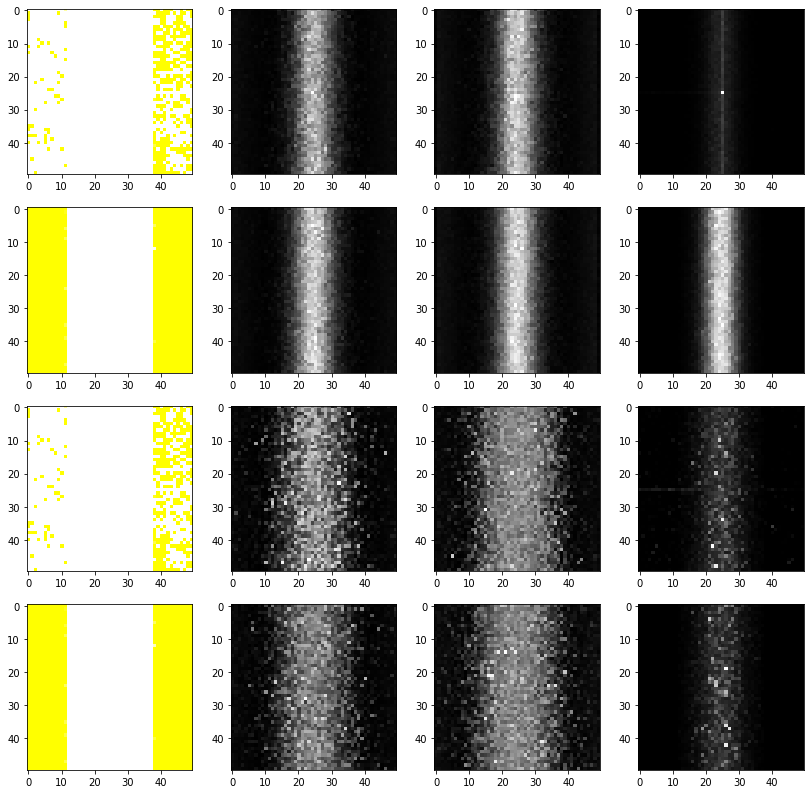

In [135]:
f, axarr = plt.subplots(4,4, figsize=(14,14))
axarr[0][0].imshow(bhcombinedSum, cmap='gray')
axarr[1][0].imshow(sphcombinedSum, cmap='gray')
axarr[2][0].imshow(bhcombinedMax, cmap='gray')
axarr[3][0].imshow(sphcombinedMax, cmap='gray')
for i in range(1,4):
    axarr[0][i].imshow(bhcombinedSum[:,:,(i-1):i], cmap='gray')
    axarr[1][i].imshow(sphcombinedSum[:,:,(i-1):i], cmap='gray')
    axarr[2][i].imshow(bhcombinedMax[:,:,(i-1):i], cmap='gray')
    axarr[3][i].imshow(sphcombinedMax[:,:,(i-1):i], cmap='gray')

In [16]:
print(str(np.asarray(bhcombinedSum.flatten()).sum()) + " sum of bh sum")
print(str(np.asarray(sphcombinedSum.flatten()).sum()) + " sum of sph sum")
print(str(np.asarray(bhcombinedMax.flatten()).sum()) + " sum of bh max")
print(str(np.asarray(sphcombinedMax.flatten()).sum()) + " sum of sph max")

119484260.0 sum of bh sum
111568430.0 sum of sph sum
9042296.0 sum of bh max
6173283.0 sum of sph max


119_484_260.0 sum of bh sum  
111_568_430.0 sum of sph sum  
9_042_296.0 sum of bh max  
6_173_283.0 sum of sph max  

Sum is mostly equal, but max value is not.  
Since sph value is lower in max, this means that most values are stacked in sph

In [17]:
print(np.asarray(bhArray[0]).flatten().sum())
print(np.asarray(sphArray[0]).flatten().sum())

9714.917
10110.197


In [18]:
slice = np.zeros((50,50,1))
for i in range(50):
    for j in range(50):
        for rgb in range(3):
            slice[i][j] += bhcombinedSum[i][j][rgb]


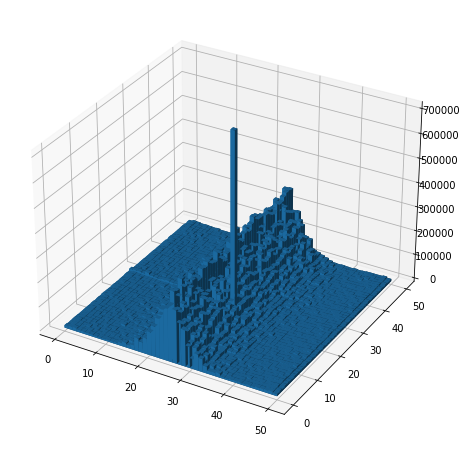

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x_data, y_data = np.meshgrid( np.arange(slice.shape[1]),
                              np.arange(slice.shape[0]) )


x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = slice.flatten()

ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data)
plt.show()

In [20]:
bhList = []
for i in range(10_000):
    slice = np.ones((50,50,1))
    for j in range(50):
        for k in range(50):
            for rgb in range(3):
                if slice[j][k] < bhArray[i][j][k][rgb]:
                    slice[j][k] = bhArray[i][j][k][rgb]
    bhList.append(slice)

print(np.shape(bhList))


(10000, 50, 50, 1)


In [21]:
sphList = []
for i in range(10_000):
    slice = np.ones((50,50,1))
    for j in range(50):
        for k in range(50):
            for rgb in range(3):
                if slice[j][k] < sphArray[i][j][k][rgb]:
                    slice[j][k] = sphArray[i][j][k][rgb]
    sphList.append(slice)

print(np.shape(sphList))

(10000, 50, 50, 1)


In [22]:
bhListSum = [np.sum(x) for x in bhList]

In [23]:
sphListSum = [np.sum(x) for x in sphList]

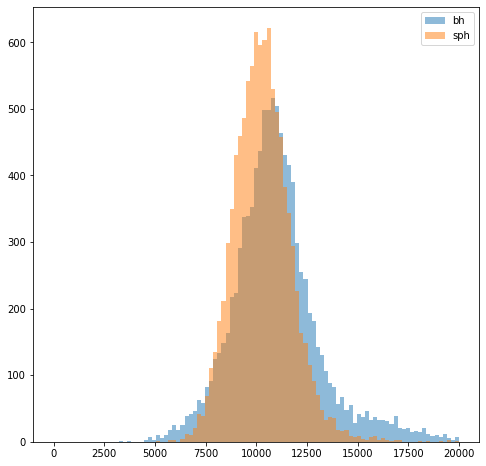

In [24]:
bins = np.linspace(-10, 20_000, 100)
plt.figure(figsize=(8,8))
plt.hist(bhListSum, bins, alpha=0.5, label='bh')
plt.hist(sphListSum, bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

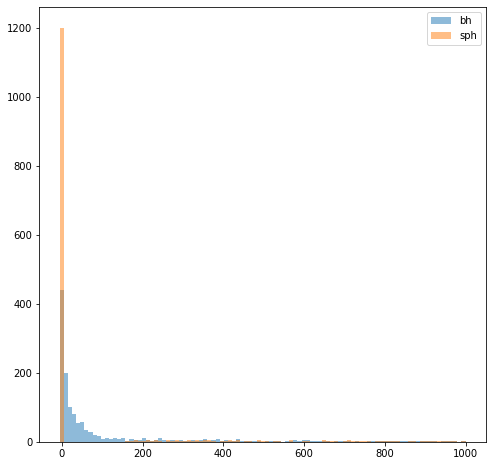

In [105]:
bins = np.linspace(-5, 1_000, 100)
plt.figure(figsize=(8,8))
plt.hist(bhcombinedSum[:,:,2:3].flatten(), bins, alpha=0.5, label='bh')
plt.hist(sphcombinedSum[:,:,2:3].flatten(), bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

In [26]:
print(np.sum([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()]))
print(np.sum([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()]))

1190
159


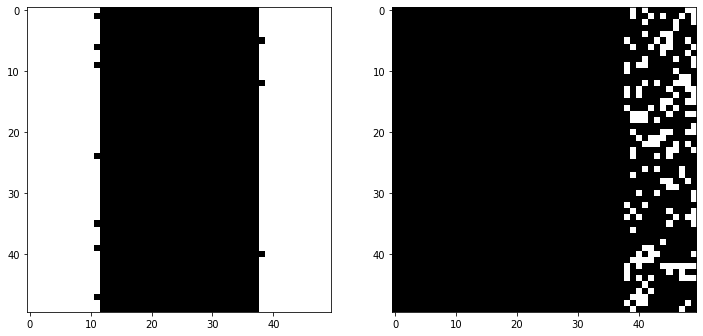

In [27]:
f, axarr = plt.subplots(1,2, figsize=(12,12))
axarr[0].imshow(np.reshape([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')
axarr[1].imshow(np.reshape([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')

In [110]:
def predbh(histo): #Returns true if bh
    a = histo[:,:,2:3].copy()
    #should be 50x50x1
    #check only valid area
    for j in range(50):
        for i in range(0,12):
            if a[j][i] != 0.0:
                # print(j)
                return True #bh
        
        for i in range(38,50):
            if a[j][i] != 0.0:
                # print(j)
                return True #bh
    return False #not bh


In [111]:
sumbh = 0
sumsph = 0
for i in range(10_000):
    if predbh(bhArray[i]):
        sumbh += 1
        print(i)
    if not predbh(sphArray[i]):
        sumsph += 1

print(sumbh, "number of true bh")
print(sumsph, "number of true sph")

284
746
6079
6890
7097
8129
8130
8131
8133
8134
8137
8138
8139
8140
8141
8142
8144
8145
8148
8149
8150
8152
8153
8155
8156
8158
8160
8161
8163
8164
8165
8167
8169
8171
8173
8174
8175
8176
8178
8180
8181
8183
8184
8185
8186
8187
8188
8189
8191
8192
8194
8195
8196
8197
8198
8199
8202
8203
8204
8206
8207
8209
8210
8211
8213
8214
8215
8217
8218
8219
8221
8222
8227
8228
8230
8231
8232
8233
8234
8236
8237
8238
8239
8240
8241
8242
8244
8245
8247
8248
8249
8250
8253
8254
8256
8258
8260
8261
8262
8264
8265
8267
8269
8270
8272
8273
8275
8276
8277
8278
8280
8281
8283
8284
8285
8287
8288
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8302
8303
8304
8306
8308
8309
8310
8311
8314
8315
8316
8318
8319
8321
8322
8325
8326
8327
8330
8332
8333
8336
8337
8338
8339
8341
8342
8343
8345
8347
8349
8350
8351
8353
8354
8356
8358
8359
8360
8361
8362
8364
8365
8366
8369
8370
8372
8373
8374
8376
8377
8378
8380
8381
8382
8383
8384
8385
8387
8388
8389
8391
8392
8393
8395
8396
8397
8398
8399
8400
8403
8404
8405
84

False
0.0


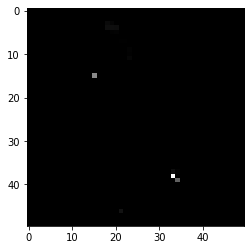

In [92]:
i = 0
print(predbh(bhArray[i]))
print(bhArray[i][3,15,2])
plt.imshow(bhArray[i][:,:,2:3], cmap='gray')

In [32]:
bhLayerList = []
for i in range(10_000):
    a = bhArray[i][:,:,2:3].flatten()
    bhLayerList.append(np.median(a[a != 0.0]))

print(np.shape(bhLayerList))
print(np.sum(bhLayerList))


(10000,)
16074.052


In [33]:
sphLayerList = []
for i in range(10_000):
    a = sphArray[i][:,:,2:3].flatten()
    sphLayerList.append(np.median(a[a != 0.0]))

print(np.shape(sphLayerList))
print(np.sum(sphLayerList))

(10000,)
16843.16


In [34]:
a = bhArray[1][:,:,2:3].flatten()
print(np.median(a[a != 0.0]))
b = sphArray[1][:,:,2:3].flatten()
print(np.median(b[b != 0.0]))

2.086827
1.7446486


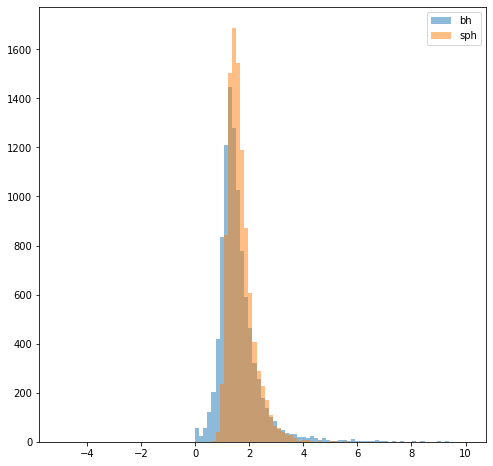

In [35]:
bins = np.linspace(-5, 10, 100)
plt.figure(figsize=(8,8))
plt.hist(bhLayerList, bins, alpha=0.5, label='bh')
plt.hist(sphLayerList, bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

In [36]:
print(np.median(bhcombinedSum[:,:,2:3]))
print(np.median(sphcombinedSum[:,:,2:3]))


617.0991
340.3864


In [37]:
print(np.sum(bhcombinedSum[:,:,2:3]))
print(np.sum(sphcombinedSum[:,:,2:3]))

37984410.0
36303250.0


In [38]:
print(np.max(bhcombinedSum[:,:,2:3]))
print(np.max(sphcombinedSum[:,:,2:3]))


607435.3
99911.15
